In [2]:

import numpy as np
import sys
from matplotlib import pyplot as plt
import SimpleITK as sitk
import pickle as pkl

import os



sys.path.append("../")

sys.path.append("../../")

from scripts.Registration3D.registration import central_normalize_img, calculate_ct2us_transform

from scripts.segmentation_metrics import precision, recall, dice

from UltrasoundNavigation.img_utils import flip_img


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 3D Registration between US and CT

In [26]:
import random

random.seed(10)
np.random.seed(17)

original_vessel_ct = sitk.ReadImage('./data/vessel_ct.nii.gz')
# The left-right order is different between the US image and CT image. We flip vessel_ct to make them consistent.
original_vessel_ct = flip_img(original_vessel_ct,[True,False,False])
vessel_ct = central_normalize_img(original_vessel_ct,150)

pre_stats = []
post_stats = []
try:
    os.mkdir('results')
except OSError as error:
    print(error)


for us_idx in range(10):
# for us_idx in range(1):
    original_vessel_us = sitk.ReadImage('./data/prediction_{}.seg.nrrd'.format(us_idx))
    vessel_us = central_normalize_img(original_vessel_us,150)

    CT2US, Hp, Hg, Hreg = calculate_ct2us_transform(vessel_us,vessel_ct)

    output_folder = './results/{}'.format(us_idx)
    try:
        os.mkdir(output_folder)
    except OSError as error:
        print(error)
        
    
    sitk.WriteImage(Hp,output_folder+'/shifted_us.nii.gz')
    sitk.WriteImage(Hg,output_folder+'/resampled_CT.nii.gz')
    sitk.WriteImage(Hreg,output_folder+'/vessel_reg.nii.gz')

    with open(output_folder+'/transformation.pkl','wb') as fp:
        pkl.dump(CT2US,fp)

    hp = sitk.GetArrayFromImage(Hp)>0.5
    hg = sitk.GetArrayFromImage(Hg)>0.5
    hr = sitk.GetArrayFromImage(Hreg)>0.5

    pre_stats.append((precision(hp,hg), recall(hp,hg), dice(hp,hg)))
    post_stats.append((precision(hr,hg), recall(hr,hg), dice(hr,hg)))
    

[Errno 17] File exists: 'results'
Start optimizing the transformation


100%|██████████| 2/2 [00:02<00:00,  1.06s/it]


[Errno 17] File exists: './results/0'
Start optimizing the transformation


100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


[Errno 17] File exists: './results/1'
Start optimizing the transformation


100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


[Errno 17] File exists: './results/2'
Start optimizing the transformation


100%|██████████| 2/2 [00:01<00:00,  1.31it/s]


[Errno 17] File exists: './results/3'
Start optimizing the transformation


100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


[Errno 17] File exists: './results/4'
Start optimizing the transformation


100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


[Errno 17] File exists: './results/5'
Start optimizing the transformation


100%|██████████| 2/2 [00:01<00:00,  1.27it/s]


[Errno 17] File exists: './results/6'
Start optimizing the transformation


100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


[Errno 17] File exists: './results/7'
Start optimizing the transformation


100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


[Errno 17] File exists: './results/8'
Start optimizing the transformation


100%|██████████| 2/2 [00:01<00:00,  1.16it/s]


[Errno 17] File exists: './results/9'


In [27]:
with open('results/stats.pkl','wb') as fp:
    pkl.dump({"pre_stats":pre_stats,"post_stats":post_stats},fp)

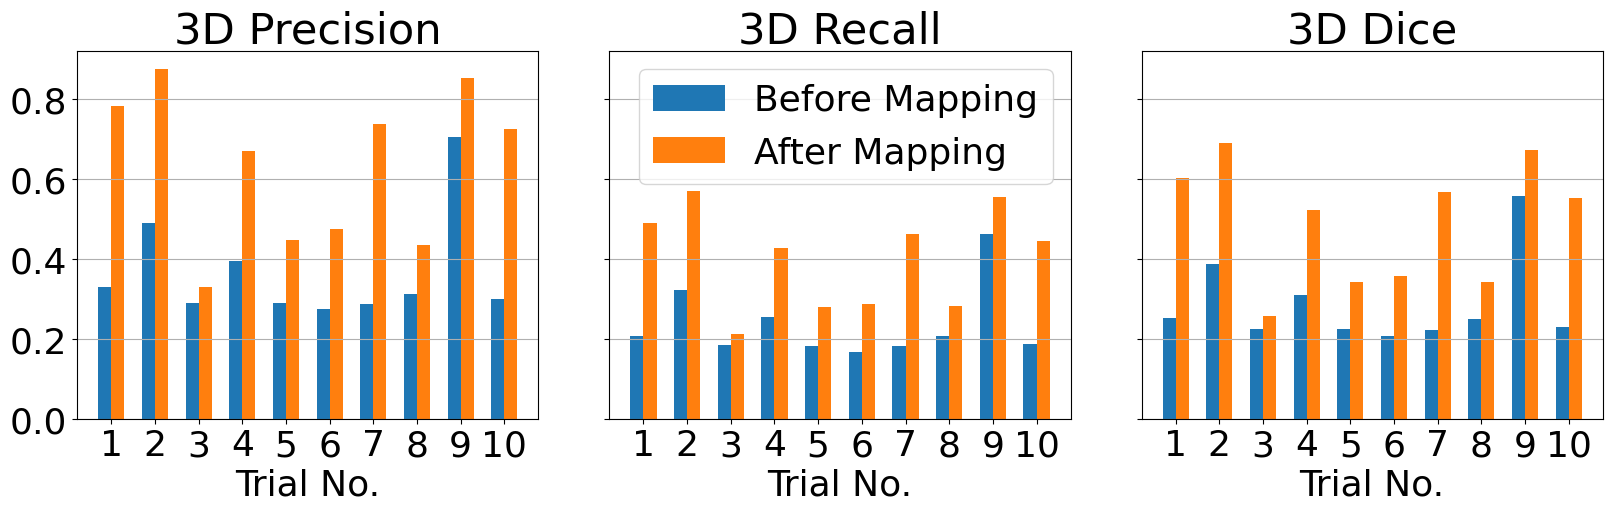

In [28]:
metric_name = ['3D Precision','3D Recall','3D Dice']

plt.rc('font',size=26)
fig,axes = plt.subplots(1,3,figsize=(16,5),sharey=True)
legend_plot = 1
for i in range(3):
    ax = axes[i]
    pre_precision = [p[i] for p in pre_stats]

    post_precision = [p[i] for p in post_stats]

    width = 0.3

    ax.bar(np.arange(1,11)-width/2, pre_precision,width,label='Before Mapping' if i==legend_plot else None)

    ax.bar(np.arange(1,11)+width/2, post_precision,width,label='After Mapping' if i==legend_plot else None)
    ax.set_xticks(np.arange(1,11))
    ax.yaxis.grid('on')
    if i==legend_plot:
        ax.legend()
    ax.set_title(metric_name[i])
    ax.set_xlabel('Trial No.')
plt.tight_layout(pad=0.1)
plt.savefig('./figures/registration_metric.png')
plt.show()

In [29]:
pre_stats = np.array(pre_stats)
post_stats = np.array(post_stats)

pre_mean = np.mean(pre_stats,axis=0)
post_mean = np.mean(post_stats,axis=0)

In [30]:
pre_mean,post_mean,post_mean-pre_mean

(array([0.3668989 , 0.23516283, 0.28657476]),
 array([0.63283829, 0.40076862, 0.49067968]),
 array([0.26593939, 0.16560578, 0.20410492]))

In [10]:
print(CT2US)

itk::simple::CompositeTransform
 CompositeTransform (0x13a2198d0)
   RTTI typeinfo:   itk::CompositeTransform<double, 3u>
   Reference Count: 1
   Modified Time: 13532966
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   TranslationTransform (0x13a20e3f0)
     RTTI typeinfo:   itk::TranslationTransform<double, 3u>
     Reference Count: 1
     Modified Time: 3865
     Debug: Off
     Object Name: 
     Observers: 
       none
     Offset: [-159.362, -56.8273, -71.171]
   >>>>>>>>>
   CompositeTransform (0x14af07290)
     RTTI typeinfo:   itk::CompositeTransform<double, 3u>
     Reference Count: 1
     Modified Time: 13532962
     Debug: Off
     Object Name: 
     Observers: 
       none
     Transforms in queue, from begin to end:
     >>>>>>>>>
     Euler3DTransform (0x14af0e880)
       RTTI typeinfo:   itk::Euler3DTransform<double>
       Reference Count: 1
       Modified Time: 13532960
       Debug: Off
       Object 

In [39]:
with open('./data/CT2US.pkl','wb') as fp:
    pkl.dump(CT2US,fp)

In [40]:
with open('./data/CT2US.pkl','rb') as fp:
    CT2US = pkl.load(fp)